# pandas 그룹화 기능을 사용한 데이터 분석
 
-2016 US Election 데이터셋 분석하기

-dataset download : : https://drive.google.com/file/d/0B9fcvsgEhJNsN0FUaGZudFYyTVU/view

**2016 US Election 데이터셋의 주요 컬럼 요약**
 
**primary_results.csv**

 • state: state where the primary or caucus was held
 
 • state_abbreviation: two letter state abbreviation
 
 • county: county where the results come from
 
 • fips: FIPS county code
 
 • party: Democrat or Republican
 
 • candidate: name of the candidate
 
 • votes: number of votes the candidate received in the corresponding state and county (may be missing)
 
 • fraction_votes: fraction of votes the president received in the corresponding state, county, and primary
  
**county_facts.csv**

 • "RHI125214: White alone, percent, 2014
 
 • "RHI225214": Black or African American alone, percent, 2014
 
 • "RHI325214": "American Indian and Alaska Native alone, percent, 2014
 
 • "RHI425214": Asian alone, percent, 2014
 
 • "RHI525214": Native Hawaiian and Other Pacific Islander alone, percent, 2014
 
 • "RHI625214": Two or More Races, percent, 2014
 
 • "RHI725214": Hispanic or Latino, percent, 2014
 
 • "RHI825214": White alone, not Hispanic or Latino, percent, 2014
  
(기타 컬럼 생략)
 
* 참고: https://www.kaggle.com/benhamner/2016-us-election


In [1]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### 각 후보 별 전체 득표수 계산하기

In [3]:
primary = pd.read_csv('data/2016_presidential_election/primary_results.csv', sep=',')

In [4]:
counties = pd.read_csv('data/2016_presidential_election/county_facts.csv', sep=',')

In [5]:
primary.head()

state state_abbreviation   county  fips       party     candidate  votes  \
0  Alabama                 AL  Autauga  1001  Republican  Donald Trump   5387   
1  Alabama                 AL  Autauga  1001  Republican      Ted Cruz   2482   
2  Alabama                 AL  Autauga  1001  Republican   Marco Rubio   1785   
3  Alabama                 AL  Autauga  1001  Republican    Ben Carson   1764   
4  Alabama                 AL  Autauga  1001  Republican   John Kasich    421   

   fraction_votes  
0           0.445  
1           0.205  
2           0.148  
3           0.146  
4           0.035

In [6]:
primary[['state', 'county', 'fips']]

state      county   fips
0            Alabama     Autauga   1001
1            Alabama     Autauga   1001
2            Alabama     Autauga   1001
3            Alabama     Autauga   1001
4            Alabama     Autauga   1001
5            Alabama     Autauga   1001
6            Alabama     Autauga   1001
7            Alabama     Baldwin   1003
8            Alabama     Baldwin   1003
9            Alabama     Baldwin   1003
10           Alabama     Baldwin   1003
11           Alabama     Baldwin   1003
12           Alabama     Baldwin   1003
13           Alabama     Baldwin   1003
14           Alabama     Barbour   1005
15           Alabama     Barbour   1005
16           Alabama     Barbour   1005
17           Alabama     Barbour   1005
18           Alabama     Barbour   1005
19           Alabama     Barbour   1005
20           Alabama     Barbour   1005
21           Alabama        Bibb   1007
22           Alabama        Bibb   1007
23           Alabama        Bibb   1007
24           Alabama        Bibb   1007
25           Alabama        Bibb   1007
26           Alabama        Bibb   1007
27           Alabama        Bibb   1007
28           Alabama      Blount   1009
29           Alabama      Blount   1009
...              ...         ...    ...
13182  New Hampshire  Rockingham  33015
13183  New Hampshire  Rockingham  33015
13184  New Hampshire  Rockingham  33015
13185  New Hampshire  Rockingham  33015
13186  New Hampshire  Rockingham  33015
13187  New Hampshire  Rockingham  33015
13188  New Hampshire  Rockingham  33015
13189  New Hampshire  Rockingham  33015
13190  New Hampshire  Rockingham  33015
13191  New Hampshire  Rockingham  33015
13192  New Hampshire   Strafford  33017
13193  New Hampshire   Strafford  33017
13194  New Hampshire   Strafford  33017
13195  New Hampshire   Strafford  33017
13196  New Hampshire   Strafford  33017
13197  New Hampshire   Strafford  33017
13198  New Hampshire   Strafford  33017
13199  New Hampshire   Strafford  33017
13200  New Hampshire   Strafford  33017
13201  New Hampshire   Strafford  33017
13202  New Hampshire    Sullivan  33019
13203  New Hampshire    Sullivan  33019
13204  New Hampshire    Sullivan  33019
13205  New Hampshire    Sullivan  33019
13206  New Hampshire    Sullivan  33019
13207  New Hampshire    Sullivan  33019
13208  New Hampshire    Sullivan  33019
13209  New Hampshire    Sullivan  33019
13210  New Hampshire    Sullivan  33019
13211  New Hampshire    Sullivan  33019

[13212 rows x 3 columns]

In [7]:
counties.head()

fips       area_name state_abbreviation  PST045214  PST040210  PST120214  \
0     0   United States                NaN  318857056  308758105        3.3   
1  1000         Alabama                NaN    4849377    4780127        1.4   
2  1001  Autauga County                 AL      55395      54571        1.5   
3  1003  Baldwin County                 AL     200111     182265        9.8   
4  1005  Barbour County                 AL      26887      27457       -2.1   

   POP010210  AGE135214  AGE295214  AGE775214    ...      SBO415207  \
0  308745538        6.2       23.1       14.5    ...            8.3   
1    4779736        6.1       22.8       15.3    ...            1.2   
2      54571        6.0       25.2       13.8    ...            0.7   
3     182265        5.6       22.2       18.7    ...            1.3   
4      27457        5.7       21.2       16.5    ...            0.0   

   SBO015207   MAN450207   WTN220207   RTN130207  RTN131207  AFN120207  \
0       28.8  5319456312  4174286516  3917663456      12990  613795732   
1       28.1   112858843    52252752    57344851      12364    6426342   
2       31.7           0           0      598175      12003      88157   
3       27.3     1410273           0     2966489      17166     436955   
4       27.0           0           0      188337       6334          0   

   BPS030214   LND110210  POP060210  
0    1046363  3531905.43       87.4  
1      13369    50645.33       94.4  
2        131      594.44       91.8  
3       1384     1589.78      114.6  
4          8      884.88       31.0  

[5 rows x 54 columns]

In [8]:
primary.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [9]:
primary.shape

(13212, 8)

In [10]:
counties.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [11]:
counties.shape

(3195, 54)

In [12]:
primary['candidate'].unique()

array(['Donald Trump', 'Ted Cruz', 'Marco Rubio', 'Ben Carson',
       'John Kasich', 'Hillary Clinton', 'Bernie Sanders',
       'Carly Fiorina', 'Rand Paul', 'Mike Huckabee', 'Rick Santorum',
       'Jeb Bush', 'Chris Christie', "Martin O'Malley", ' Uncommitted',
       ' No Preference'], dtype=object)

In [14]:
primary.groupby('candidate')['votes'].sum()

candidate
 No Preference         313
 Uncommitted            43
Ben Carson          528463
Bernie Sanders     4740278
Carly Fiorina        15181
Chris Christie       24347
Donald Trump       6944654
Hillary Clinton    7178257
Jeb Bush             94394
John Kasich        2456406
Marco Rubio        2998335
Martin O'Malley        747
Mike Huckabee         3300
Rand Paul             8460
Rick Santorum         1773
Ted Cruz           5248807
Name: votes, dtype: int64

In [15]:
candidate_to_votes_s = primary.groupby('candidate')['votes'].sum().sort_values()
candidate_to_votes_s

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

<IPython.core.display.Javascript object>


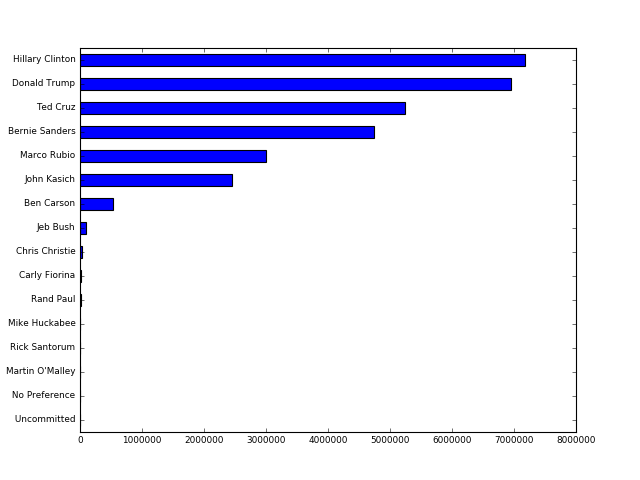

In [16]:
candidate_to_votes_s.plot(kind='barh', fontsize=8)

### 각 주별, 각 정당의 득표 비율 계산하기

In [17]:
primary.head()

state state_abbreviation   county  fips       party     candidate  votes  \
0  Alabama                 AL  Autauga  1001  Republican  Donald Trump   5387   
1  Alabama                 AL  Autauga  1001  Republican      Ted Cruz   2482   
2  Alabama                 AL  Autauga  1001  Republican   Marco Rubio   1785   
3  Alabama                 AL  Autauga  1001  Republican    Ben Carson   1764   
4  Alabama                 AL  Autauga  1001  Republican   John Kasich    421   

   fraction_votes  
0           0.445  
1           0.205  
2           0.148  
3           0.146  
4           0.035

In [18]:
state_party_to_votes_s = primary.groupby(['state','party'])['votes'].sum()

In [19]:
state_party_to_votes_s.head()

state     party     
Alabama   Democrat      381810
          Republican    805814
Arizona   Democrat      399097
          Republican    435103
Arkansas  Democrat      207182
Name: votes, dtype: int64

In [20]:
state_to_votes_s = primary.groupby('state')['votes'].sum()
state_to_votes_s.head()

state
Alabama     1187624
Arizona      834200
Arkansas     602290
Colorado     121184
Florida     3767915
Name: votes, dtype: int64

In [22]:
# 각 주별, 정당의 비율
state_party_to_vote_pcts_s = (state_party_to_votes_s / state_to_votes_s) * 100
state_party_to_vote_pcts_s.head()

state     party     
Alabama   Democrat      32.149064
          Republican    67.850936
Arizona   Democrat      47.841884
          Republican    52.158116
Arkansas  Democrat      34.399044
Name: votes, dtype: float64

<IPython.core.display.Javascript object>


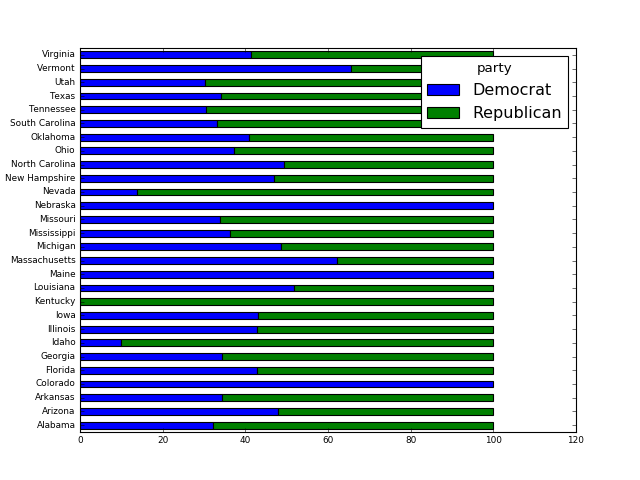

In [23]:
state_party_to_vote_pcts_s.unstack().plot(kind='barh', stacked = True, fontsize=8)

### 각 후보가 당선된 county의 평균 백인 유권자 비율 조사하기

In [24]:
func = lambda agg_df: agg_df.sort_values('votes',ascending=False).iloc[0]  # ascending : 내림차순정렬, agg_df : 그룹화된 dataframe

In [25]:
primary.head()

state state_abbreviation   county  fips       party     candidate  votes  \
0  Alabama                 AL  Autauga  1001  Republican  Donald Trump   5387   
1  Alabama                 AL  Autauga  1001  Republican      Ted Cruz   2482   
2  Alabama                 AL  Autauga  1001  Republican   Marco Rubio   1785   
3  Alabama                 AL  Autauga  1001  Republican    Ben Carson   1764   
4  Alabama                 AL  Autauga  1001  Republican   John Kasich    421   

   fraction_votes  
0           0.445  
1           0.205  
2           0.148  
3           0.146  
4           0.035

In [26]:
winners = primary.groupby("fips").agg(func)

In [27]:
winners.head()

state state_abbreviation   county       party        candidate  votes  \
fips                                                                            
1001  Alabama                 AL  Autauga  Republican     Donald Trump   5387   
1003  Alabama                 AL  Baldwin  Republican     Donald Trump  23618   
1005  Alabama                 AL  Barbour    Democrat  Hillary Clinton   2567   
1007  Alabama                 AL     Bibb  Republican     Donald Trump   1959   
1009  Alabama                 AL   Blount  Republican     Donald Trump   7390   

      fraction_votes  
fips                  
1001           0.445  
1003           0.469  
1005           0.906  
1007           0.494  
1009           0.487

In [28]:
winners_county_races = pd.merge(winners, counties[["fips", "RHI825214"]], 
                                left_index=True, right_on="fips", how="left")

In [29]:
winners_county_races = winners_county_races.rename(columns={"RHI825214":"white_pcts"})

In [30]:
winners_county_races.head()

state state_abbreviation   county       party        candidate  votes  \
2  Alabama                 AL  Autauga  Republican     Donald Trump   5387   
3  Alabama                 AL  Baldwin  Republican     Donald Trump  23618   
4  Alabama                 AL  Barbour    Democrat  Hillary Clinton   2567   
5  Alabama                 AL     Bibb  Republican     Donald Trump   1959   
6  Alabama                 AL   Blount  Republican     Donald Trump   7390   

   fraction_votes  fips  white_pcts  
2           0.445  1001        75.6  
3           0.469  1003        83.0  
4           0.906  1005        46.6  
5           0.494  1007        74.5  
6           0.487  1009        87.8

In [31]:
winners_county_white_pcts = winners_county_races.groupby(["party", "candidate"])["white_pcts"].mean()

In [32]:
winners_county_white_pcts.head()

party       candidate      
Democrat    Bernie Sanders     81.944030
            Hillary Clinton    56.856920
Republican  Ben Carson         81.100000
            Donald Trump       83.235638
            John Kasich        89.226415
Name: white_pcts, dtype: float64

<IPython.core.display.Javascript object>


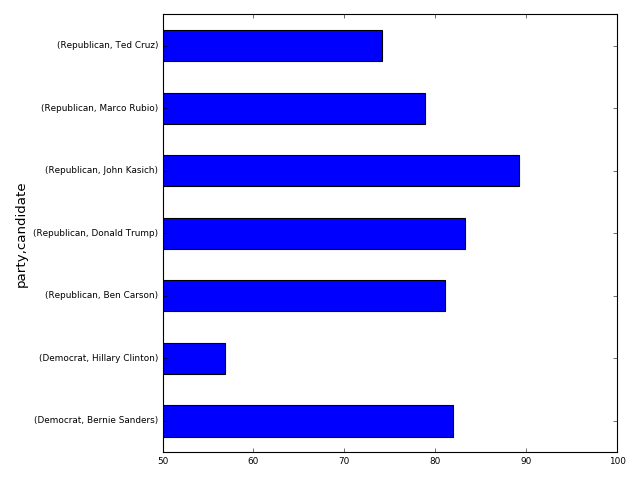

In [35]:
ax = winners_county_white_pcts.plot(kind="barh", fontsize=8)

In [36]:
ax.set_xlim([50, 100])

(50, 100)

In [37]:
plt.tight_layout()

### Pivot Table 사용하기
 
**'피벗 테이블(pivot table)'**을 사용하면, 데이터셋에 대하여 그룹화에 기반한 통계량을 계산하는 작업이 더 간편해진다. 
 
피벗 테이블은 df.pivot_table() 함수를 사용하여 생성한다. values 인자로는 통계량을 계산할 열을, index와 columns 인자는 각각 그 값을 피벗 테이블의 인덱스와 컬럼으로 사용할 열을, aggfunc 인자로는 적용할 통계 함수를 명시.


In [59]:
total_votes = primary.pivot_table(values="votes", index="state", 
                                  columns="candidate", aggfunc="sum", 
                                  fill_value=0)

In [60]:
total_votes.head()

candidate   No Preference   Uncommitted  Ben Carson  Bernie Sanders  \
state                                                                 
Alabama                 0             0       84139           74987   
Arizona                 0             0           0          163400   
Arkansas                0             0       23105           64514   
Colorado                0             0           0           71928   
Florida                 0             0           0          547051   

candidate  Carly Fiorina  Chris Christie  Donald Trump  Hillary Clinton  \
state                                                                     
Alabama                0               0        356892           306823   
Arizona                0               0        249916           235697   
Arkansas               0               0        132546           142668   
Colorado               0               0             0            49256   
Florida                0               0       1015451          1064566   

candidate  Jeb Bush  John Kasich  Marco Rubio  Martin O'Malley  Mike Huckabee  \
state                                                                           
Alabama           0        37127       154379                0              0   
Arizona           0        53040            0                0              0   
Arkansas          0        15079       100999                0              0   
Colorado          0            0            0                0              0   
Florida           0       150167       607491                0              0   

candidate  Rand Paul  Rick Santorum  Ted Cruz  
state                                          
Alabama            0              0    173277  
Arizona            0              0    132147  
Arkansas           0              0    123379  
Colorado           0              0         0  
Florida            0              0    383189

예를 들어 total_votes라는 피벗 테이블은 "state"와 "candidate" 열의 값을 그룹화 기준으로 하여, "votes" 열의 값의 합계를 산출한 결과이다. 이 때 fill_value=0 인자를 넣어주면, NaN이 나올 부분이 0으로 대체된다. 피벗 테이블도 DataFrame 형태를 지님.
 
혹은 다음과 같이 하면 "state_abbreviation"과 "party" 열의 값을 그룹화 기준으로 하여, "fraction_votes" 열의 값의 평균을 나타내는 피벗 테이블을 만들 수 있다.


In [61]:
primary.pivot_table(values="fraction_votes", index="state_abbreviation", 
                    columns="party", aggfunc="mean")

party               Democrat  Republican
state_abbreviation                      
AL                  0.476823    0.195277
AR                  0.464784    0.191924
AZ                  0.478433    0.283867
CO                  0.481016         NaN
FL                  0.469349    0.242413
GA                  0.493525    0.196939
IA                  0.250003    0.090857
ID                  0.494733    0.240773
IL                  0.489632    0.242013
KY                       NaN    0.245298
LA                  0.451481    0.240803
MA                  0.331875    0.193800
ME                  0.450000         NaN
MI                  0.487741    0.237265
MO                  0.489403    0.243236
MS                  0.493563    0.243344
NC                  0.462404    0.242886
NE                  0.489258         NaN
NH                  0.500000    0.125000
NV                  0.498559    0.199047
OH                  0.492199    0.245074
OK                  0.442500    0.196789
SC                  0.496587    0.166649
TN                  0.486037    0.195819
TX                  0.479496    0.191347
UT                  0.438103    0.333379
VA                  0.496778    0.197768
VT                  0.498591    0.193273